In [1]:
import pandas as pd
import numpy

# 时间序列
- 时间戳 (timestamp)
- 固定同期 (period)
- 时间间隔 (interval)

# 滑动窗口
- 每次都取 step个数据，只是Start Index不一样
```
如: 从 2017-01-01 ~ 2017-12-31号一共有 365个样本，step = 10
则 r1 = 2017-01-01 ~ 2017-01-10
   r2 = 2017-01-02 ~ 2017-01-11
   r3 = 2017-01-03 ~ 2017-01-12
   ...
```

# date_range
- 可以指定开始时间与周期
- H: 时
- D: 天
- M: 月

In [7]:
# format: 年/月/日, 月/日/年, 年-月-日, 月-日-年
rng = pd.date_range('2017/06/01', periods=10, freq='D')
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04',
               '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-10'],
              dtype='datetime64[ns]', freq='D')

In [14]:
import datetime
time = pd.Series(numpy.random.random(20), index = pd.date_range(datetime.datetime(2017,1,1), periods=20))
time

2017-01-01    0.689327
2017-01-02    0.481689
2017-01-03    0.864625
2017-01-04    0.700496
2017-01-05    0.568312
2017-01-06    0.302672
2017-01-07    0.191734
2017-01-08    0.351964
2017-01-09    0.266854
2017-01-10    0.159747
2017-01-11    0.436411
2017-01-12    0.110051
2017-01-13    0.056768
2017-01-14    0.768282
2017-01-15    0.363255
2017-01-16    0.718339
2017-01-17    0.223743
2017-01-18    0.975483
2017-01-19    0.373719
2017-01-20    0.831309
Freq: D, dtype: float64

In [12]:
print time['2017-01-02']

0.224906007821


In [13]:
print time['2017-01-02': '2017-01-10']

2017-01-02    0.224906
2017-01-03    0.385318
2017-01-04    0.995628
2017-01-05    0.646881
2017-01-06    0.495740
2017-01-07    0.674880
2017-01-08    0.227466
2017-01-09    0.824849
2017-01-10    0.013277
Freq: D, dtype: float64


## truncate 过滤

In [16]:
print time.truncate(before='2017-01-10')

2017-01-10    0.159747
2017-01-11    0.436411
2017-01-12    0.110051
2017-01-13    0.056768
2017-01-14    0.768282
2017-01-15    0.363255
2017-01-16    0.718339
2017-01-17    0.223743
2017-01-18    0.975483
2017-01-19    0.373719
2017-01-20    0.831309
Freq: D, dtype: float64


In [17]:
print time.truncate(after='2017-01-10')

2017-01-01    0.689327
2017-01-02    0.481689
2017-01-03    0.864625
2017-01-04    0.700496
2017-01-05    0.568312
2017-01-06    0.302672
2017-01-07    0.191734
2017-01-08    0.351964
2017-01-09    0.266854
2017-01-10    0.159747
Freq: D, dtype: float64


In [20]:
data = pd.date_range('2017-01-01', '2017-12-31',  freq='M')
print data

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')



| 别名 | 偏移量类型 | 说明 |
|:- | :- | :- |
| D | Day | 以天为单位 |
| B | BusinessDay | 每工作日 |
| H | Hour | 每小时 |
| T 或 min | Minute | 每分 |
| S | Second | 每秒 |
| L 或 ms | Milli | 每毫秒 |
| U | Micro Milli | 每微秒 |
| M | MonthEnd | 每月最后一天 |
| BM | BusinessMonthEnd | 每月最后一个工作日 |
| MS | MonthBegin | 每月第一天 |
| BMS | BusinessMonthBegin | 每月第一个工作日 |
| W-MON, W-TUE, ... | Week | 从我指定的星期几(SUN, MON, TUE, WED, THU, FRI, SAT) 开始算起，每周产生每月的第一，二，三或者第四周的星期几，i.e: WOM-3FRI 表示每月第三个星期五. **注:** **WOM:** Week of Month|
| Q-JAN, Q-FEB, ...| QuarterEnd | 对于指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 结束的年度，每季度最后一月的 **最后一天** |
| BA-JAN, BQ-FEB, ...| BusinessQuarterEnd | 对于指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 结束的年度，每季度最后一月的最后 **一个工作日**|
| QS-JAN, QS-FEB, ...| QuarterStart | 对于指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 结束的年度，每季度最后一月的 **第一天** |
| BQS-JAN, BQS-FEB, ...| QuarterStart | 对于指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 结束的年度，每季度最后一月的 **第一个工作日** |
| A-JAN, A-FEB, ...| YearEnd | 每年指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 的最后一天 |
| BA-JAN, BA-FEB, ...| Business YearEnd| 每年指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 的**最后一个工作日** |
| AS-JAN, AS-FEB, ...| YearBegin | 每年指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 的第一天 |
| BAS-JAN, BAS-FEB, ...| Business YearEnd| 每年指定月份(JAN, FEB, MAR, APR, MAY, JUE, JUL, AUG, SEP, OCT, NOV, DEC) 的**第一个工作日** |


请参见 [Pandas Time Series](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

In [24]:
print pd.Timestamp('2018-01-11')

2018-01-11 00:00:00


In [25]:
print pd.Timestamp('2018-01-11 13')

2018-01-11 13:00:00


In [26]:
print pd.Timestamp('2018-01-11 13:20')

2018-01-11 13:20:00


# 数据重采样
- 时间数据由一个频率转换成另一个频率
- 降采样
- 升采样

In [29]:
rng = pd.date_range('01/01/2018', periods=90, freq='D')
ts = pd.Series(numpy.random.random(len(rng)), index=rng)
ts.head()

2018-01-01    0.791908
2018-01-02    0.588797
2018-01-03    0.603423
2018-01-04    0.850133
2018-01-05    0.572644
Freq: D, dtype: float64

In [36]:
tsm = ts.resample('M').sum()
print tsm

2018-01-31    16.122840
2018-02-28    15.863958
2018-03-31    13.686844
Freq: M, dtype: float64


In [37]:
print tsm['2018-03-31']

13.6868436652


In [49]:
ts.resample('12M').sum()

2018-01-31    16.122840
2019-01-31    29.550802
Freq: 12M, dtype: float64

In [59]:
ts3d = ts.resample('3D').sum()
print ts3d

2018-01-01    1.984128
2018-01-04    1.709109
2018-01-07    0.502577
2018-01-10    2.363183
2018-01-13    1.320026
2018-01-16    1.853845
2018-01-19    2.129892
2018-01-22    0.839458
2018-01-25    1.849093
2018-01-28    0.703168
2018-01-31    2.470494
2018-02-03    2.130117
2018-02-06    2.013923
2018-02-09    1.902999
2018-02-12    1.301314
2018-02-15    1.675487
2018-02-18    1.577413
2018-02-21    1.366391
2018-02-24    1.340336
2018-02-27    1.003339
2018-03-02    2.598028
2018-03-05    1.524445
2018-03-08    1.686461
2018-03-11    0.739054
2018-03-14    1.858556
2018-03-17    1.294381
2018-03-20    1.718134
2018-03-23    0.599025
2018-03-26    0.963683
2018-03-29    0.655581
Freq: 3D, dtype: float64


## 升采样

- 升采样中会遇到 **NaN** 的数据， 这时就需要对这些数据进行处理了
- **处理方法**
    * ffill  空值用前面的数值填充
    * bfill  空值用后面的数值填充
    * interpolate 线性取值


In [60]:
print ts3d.resample('D').asfreq().head()

2018-01-01    1.984128
2018-01-02         NaN
2018-01-03         NaN
2018-01-04    1.709109
2018-01-05         NaN
Freq: D, dtype: float64


In [64]:
# 用前面 1 个填充
# ffile(2) 用前面第2个填充
ts3d.resample('D').ffill(1).head()

2018-01-01    1.984128
2018-01-02    1.984128
2018-01-03         NaN
2018-01-04    1.709109
2018-01-05    1.709109
Freq: D, dtype: float64

In [66]:
# 用后面的填充
ts3d.resample('D').bfill().head()

2018-01-01    1.984128
2018-01-02    1.709109
2018-01-03    1.709109
2018-01-04    1.709109
2018-01-05    0.502577
Freq: D, dtype: float64

In [68]:
# 性线方式填充
ts3d.resample('D').interpolate('linear').head()

2018-01-01    1.984128
2018-01-02    1.892455
2018-01-03    1.800782
2018-01-04    1.709109
2018-01-05    1.306932
Freq: D, dtype: float64

# Pandas 时间序列之滑动窗口

- 每次都取 step个数据，只是Start Index不一样
```
如: 从 2017-01-01 ~ 2017-12-31号一共有 365个样本，step = 10
则 r1 = 2017-01-01 ~ 2017-01-10
   r2 = 2017-01-02 ~ 2017-01-11
   r3 = 2017-01-03 ~ 2017-01-12
   ...
```

In [69]:
import matplotlib.pyplot as plt
% matplotlib inline

In [72]:
df = pd.Series(numpy.random.random(600), index=pd.date_range('2017-01-01', periods=600, freq='D'))
df.head()

2017-01-01    0.853279
2017-01-02    0.787012
2017-01-03    0.352614
2017-01-04    0.067176
2017-01-05    0.763432
Freq: D, dtype: float64

In [76]:
# 滑动窗口

r = df.rolling(window=10)
r

Rolling [window=10,center=False,axis=0]

In [79]:
print r.mean().head(15)

2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10    0.479725
2017-01-11    0.468861
2017-01-12    0.471662
2017-01-13    0.480111
2017-01-14    0.485873
2017-01-15    0.421129
Freq: D, dtype: float64


可以看到  从 2017-01-01 到  2017-01-09 都是 'NaN', 因为我们设置的 step值是 10, 所以 前9个是没有均值的

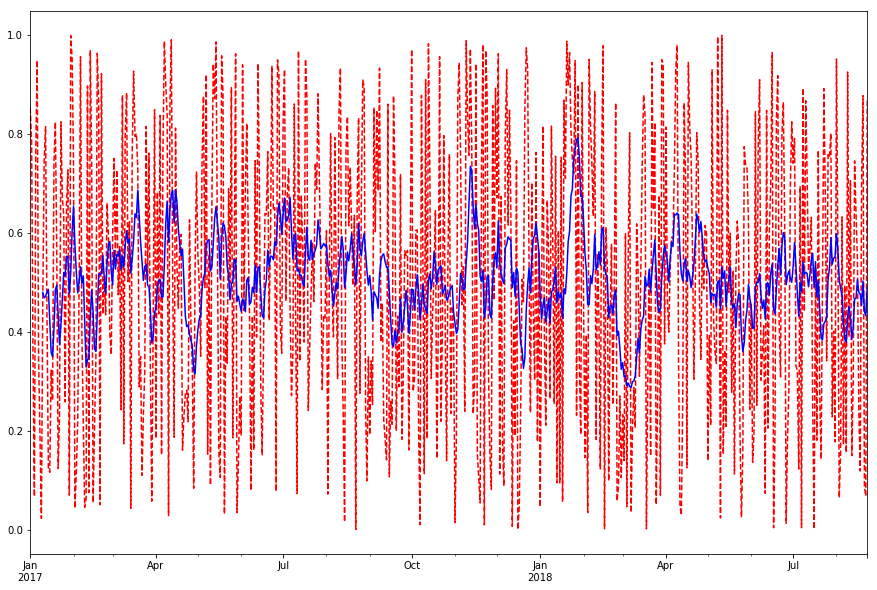

In [97]:
plt.figure(figsize=(15,10))
# 真实值用 红色 线条显示 
df.plot(style='r--')
# 均值用  蓝色 线条显示 
df.rolling(window=10).mean().plot(style='b')

plt.show()